## Problem Statement
This Dataset belongs to a Machine Learning Challenge hosted at Hacker Earth.

The description of the challange follows:

Predict the churn risk rate
Max. score: 100
Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. . Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

Task
Your task is to predict the churn score for a website based on the features provided in the dataset.

Data description
The dataset folder contains the following files:

train.csv: 36992 x 25
test.csv: 19919 x 24
sample_submission.csv: 5 x 2
The columns provided in the dataset are as follows:

Column name Description

customerid-Represents the unique identification number of a 
customer Name -Represents the name of a customer 
age Represents- the age of a customer 
securityno - Represents a unique security number that is used to identify a person
regioncategory- Represents the region that a customer belongs to 
membershipcategory - Represents the category of the membership that a customer is using
joiningdate Represents - the date when a customer became a member
joinedthroughreferral - Represents whether a customer joined using any referral code or ID 
referralid - Represents a referral ID
preferredoffertypes - Represents the type of offer that a customer prefers
mediumofoperation - Represents the medium of operation that a customer uses for transactions
internetoption - Represents - the type of internet service a customer uses
lastvisittime - Represents the last time a customer visited the website
days since lastlogin - Represents the no. of days since a customer last logged into the website
avgtimespent - Represents the average time spent by a customer on the website
avgtransactionvalue - Represents the average transaction value of a customer
avgfrequencylogindays - Represents the no. of times a customer has logged in to the website
pointsinwallet - Represents the points awarded to a customer on each transaction used 
specialdiscount - Represents whether a customer uses special discounts offered 
offerapplicationpreference - Represents whether a customer prefers offers 
pastcomplaint - Represents whether a customer has raised any complaints
complaintstatus - Represents whether the complaints raised by a customer was resolved
feedback - Represents the feedback provided by a customer 
churnriskscore[Target Variable] - Represents the churn risk score that ranges from 1 to 5 
Evaluation metric score = 100 x metrics.f1score(actual, predicted, average="macro")
 # Result submission guidelines
The index is customerid and the target is the churnrisk_score column.
The submission file must be submitted in .csv format only.
The size of this submission file must be 19919 x 2.
Note: Ensure that your submission file contains the following:

Correct index values as per the test file
Correct names of columns as provided in the sample_submission.csv file

In [128]:
# Import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [129]:
# import training set
train = pd.read_csv("train.csv")

In [130]:
#import testing set
test = pd.read_csv("test.csv")

In [131]:
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [132]:
train.tail()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3
36991,fffe43004900440033003600340034003200,Verlene Beaulieu,35,M,LBX0GLR,Town,Silver Membership,2015-10-23,No,xxxxxxxx,...,79.180000,2189.68,Error,719.970000,Yes,No,No,Not Applicable,Quality Customer Care,2


In [133]:
df = train.append(test)

In [134]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0


In [135]:
# To find out unique values in data set
unique_values = df.apply(lambda x:x.unique())
unique_values

customer_id                     [fffe4300490044003600300030003800, fffe4300490...
Name                            [Pattie Morrisey, Traci Peery, Merideth Mcmeen...
age                             [18, 32, 44, 37, 31, 13, 21, 42, 45, 25, 60, 1...
gender                                                            [F, M, Unknown]
security_no                     [XW0DQ7H, 5K0N3X1, 1F2TCL3, VJGJ33N, SVZXCWB, ...
region_category                                        [Village, City, Town, nan]
membership_category             [Platinum Membership, Premium Membership, No M...
joining_date                    [2017-08-17, 2017-08-28, 2016-11-11, 2016-10-2...
joined_through_referral                                              [No, ?, Yes]
referral_id                     [xxxxxxxx, CID21329, CID12313, CID3793, CID247...
preferred_offer_types           [Gift Vouchers/Coupons, Credit/Debit Card Offe...
medium_of_operation                                [?, Desktop, Smartphone, Both]
internet_option 

In [136]:
# to find value count of each feature
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")
value_count(df)

fffe43004900440034003600370039003400    1
fffe43004900440031003100330030003700    1
fffe43004900440035003600380033003600    1
fffe43004900440031003400330034003500    1
fffe43004900440031003800330030003100    1
                                       ..
fffe4300490044003500370037003100        1
fffe43004900440033003200300032003100    1
fffe43004900440036003200330032003800    1
fffe43004900440033003500370030003700    1
fffe43004900440036003100370035003800    1
Name: customer_id, Length: 56911, dtype: int64
--------------------------------
Gerri Farrish       1
Maryln Thiry        1
Crista Mars         1
Bonny Necessary     1
Xavier Reinbold     1
                   ..
Eliz Streicher      1
Sandee Stepney      1
Brittaney Malloy    1
Dinorah Moret       1
Loura Police        1
Name: Name, Length: 56911, dtype: int64
--------------------------------
47    1087
34    1085
42    1083
41    1082
16    1080
61    1079
38    1078
58    1074
17    1069
60    1063
28    1062
57    1062
33    1058


In [137]:
# to replace unwanted values with nan value
df.replace(to_replace=['Unknown','?','Error',-999,],value=np.nan,inplace=True)

In [138]:
#we ignore churn value of -1 because it will make bias prediction
df = df[df['churn_risk_score']!=-1]

#avg_frequency_login_days to float
df['avg_frequency_login_days']=pd.to_numeric(df['avg_frequency_login_days'],errors='coerce')

#joining_date to datetime 
df['joining_date']=pd.to_datetime(df['joining_date'],format='%Y-%m-%d')

#drop unique fitur      
df.drop(labels=['customer_id','Name','security_no','last_visit_time','referral_id'],axis=1,inplace=True)


In [139]:
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18.0,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,NaN,Wi-Fi,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0
1,32.0,F,City,Premium Membership,2017-08-28,NaN,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0
2,44.0,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0
3,37.0,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0
4,31.0,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0


In [140]:
# to find out the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55748 entries, 0 to 19918
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           55748 non-null  float64       
 1   gender                        55656 non-null  object        
 2   region_category               47537 non-null  object        
 3   membership_category           55748 non-null  object        
 4   joining_date                  55748 non-null  datetime64[ns]
 5   joined_through_referral       47458 non-null  object        
 6   preferred_offer_types         55313 non-null  object        
 7   medium_of_operation           47554 non-null  object        
 8   internet_option               55748 non-null  object        
 9   days_since_last_login         52782 non-null  float64       
 10  avg_time_spent                55748 non-null  float64       
 11  avg_transaction_value       

In [141]:
# from above we have 19 categorial features and 6 numerical features
#target feature -----> churn_risk_score  

In [142]:
df.describe()
# 75% and max difference is huge in avg_time_spent,avg_transaction_value,points_in_wallet

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,55748.000000,52782.000000,55748.000000,55748.000000,50414.000000,50444.000000,35829.000000
mean,37.036001,12.729832,243.645792,29309.220931,15.940191,686.535832,3.608278
std,15.884201,5.553963,399.980872,19492.687806,9.291256,193.714551,1.176426
min,10.000000,1.000000,-2814.109110,800.460000,-46.010295,-760.661236,1.000000
25%,23.000000,9.000000,59.667500,14209.292500,9.000000,615.870000,3.000000
50%,37.000000,13.000000,161.520000,27575.550000,16.000000,697.960000,4.000000
75%,51.000000,17.000000,355.262500,40904.880000,23.000000,764.310000,5.000000
max,64.000000,26.000000,3350.060000,99995.030000,79.469927,2069.069761,5.000000


In [143]:
# to seprate categorical and numerical variables
num=[]
cat=[]
datetime=[]

for i in df.columns:
    if df[i].dtypes =='object':
        cat.append(i)
    elif df[i].dtypes =='float64':
        num.append(i)
    else :
        datetime.append(i)
            
print(f"variabel numeric : {num}")
print(f"variabel categoric : {cat}")
print(f"variabel datetime : {datetime}")

variabel numeric : ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
variabel categoric : ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
variabel datetime : ['joining_date']


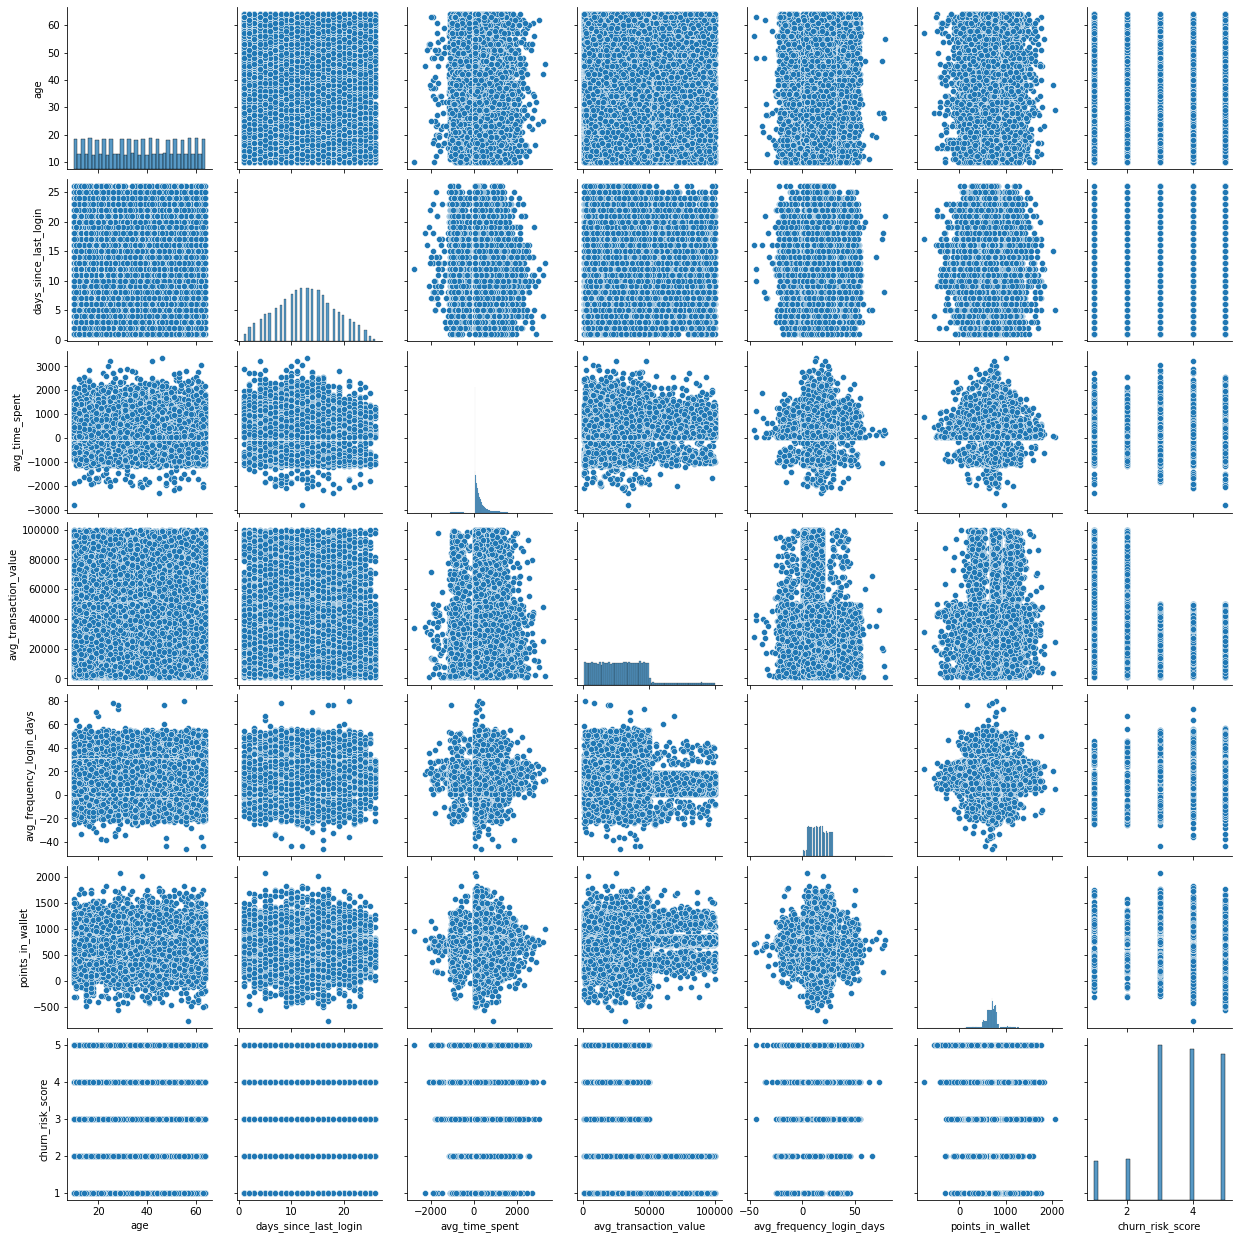

In [144]:
sns.pairplot(df)
# dosnt loook any realtion here

<AxesSubplot:>

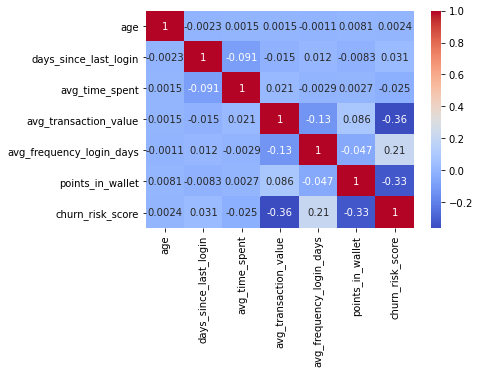

In [145]:
#correlation heatmap
sns.heatmap(df[num].corr(),cmap='coolwarm',annot=True)
#correlation of points_in_wallet is greater then avg_transaction_value with churn_risk_score but both are negative correlated

In [146]:
#to find out skweness of datset
df.skew()

age                        -0.001587
days_since_last_login       0.039795
avg_time_spent              0.586533
avg_transaction_value       1.011691
avg_frequency_login_days    0.022375
points_in_wallet           -0.089926
churn_risk_score           -0.577826
dtype: float64

In [147]:
df = df[~df['churn_risk_score'].isnull()]
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18.0,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,NaN,Wi-Fi,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0
1,32.0,F,City,Premium Membership,2017-08-28,NaN,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0
2,44.0,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0
3,37.0,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0
4,31.0,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0


In [148]:
# to find out percentage of missing values in dataset
df.isnull().mean()*100 # finout how much % data is missing in each column

age                              0.000000
gender                           0.156298
region_category                 14.689218
membership_category              0.000000
joining_date                     0.000000
joined_through_referral         14.770158
preferred_offer_types            0.770326
medium_of_operation             14.597114
internet_option                  0.000000
days_since_last_login            5.425772
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         9.542549
points_in_wallet                 9.324849
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64

In [149]:
# # converting all categorical columns to numerical and taking care of null values
df['gender'] = df['gender'].map({'F':0,'M':1})
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])


<ipython-input-149-b3419d439bb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'F':0,'M':1})
<ipython-input-149-b3419d439bb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].fillna(df['gender'].mode()[0])


In [150]:
# for i in df.columns:
#     if df[i].dtype=='float64':
#         df[i]=df[i].fillna(df[i].mean())
#     else:
#         df[i]=df[i].fillna(method='ffill')

In [151]:
df['region_category'] = df['region_category'].map({'Town':1,'Village':0,'City':2})
df['region_category']  = df['region_category'].fillna(df['region_category'].mode()[0])

<ipython-input-151-6fcebbac0102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region_category'] = df['region_category'].map({'Town':1,'Village':0,'City':2})
<ipython-input-151-6fcebbac0102>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region_category']  = df['region_category'].fillna(df['region_category'].mode()[0])


In [152]:
df['membership_category'] = df['membership_category'].map({"No Membership":0,"Basic Membership":1,'Silver Membership':2,'Gold Membership':3,'Premium Membership':4,'Platinum Membership':5})


<ipython-input-152-f73042e55264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['membership_category'] = df['membership_category'].map({"No Membership":0,"Basic Membership":1,'Silver Membership':2,'Gold Membership':3,'Premium Membership':4,'Platinum Membership':5})


In [153]:
df['joined_through_referral'] = df['joined_through_referral'].map({'No':0,'Yes':1})
df['joined_through_referral'] = df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0])
 

<ipython-input-153-963077fb9c72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['joined_through_referral'] = df['joined_through_referral'].map({'No':0,'Yes':1})
<ipython-input-153-963077fb9c72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['joined_through_referral'] = df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0])


In [154]:
df['preferred_offer_types'] = df['preferred_offer_types'].map({'Without Offers':0,'Gift Vouchers/Coupons':1,'Credit/Debit Card Offers':2})
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])


<ipython-input-154-8e5f2f44e14c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preferred_offer_types'] = df['preferred_offer_types'].map({'Without Offers':0,'Gift Vouchers/Coupons':1,'Credit/Debit Card Offers':2})
<ipython-input-154-8e5f2f44e14c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])


In [155]:
df['medium_of_operation'] = df['medium_of_operation'].map({'Desktop':1,'Smartphone':2,'Both':3})
df['medium_of_operation'] = df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0])


<ipython-input-155-667731d3b639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['medium_of_operation'] = df['medium_of_operation'].map({'Desktop':1,'Smartphone':2,'Both':3})
<ipython-input-155-667731d3b639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['medium_of_operation'] = df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0])


In [156]:
df['internet_option'] =  df['internet_option'].map({'Wi-Fi':1,'Mobile_Data':2,'Fiber_Optic':3})

<ipython-input-156-a04c2e42023a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['internet_option'] =  df['internet_option'].map({'Wi-Fi':1,'Mobile_Data':2,'Fiber_Optic':3})


In [157]:
df['used_special_discount'] = df['used_special_discount'].map({'Yes':1,'No':0})

<ipython-input-157-e23c7b77eea3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['used_special_discount'] = df['used_special_discount'].map({'Yes':1,'No':0})


In [158]:
df['offer_application_preference'] = df['offer_application_preference'].map({'Yes':1,'No':0})

<ipython-input-158-fe2cf724304a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offer_application_preference'] = df['offer_application_preference'].map({'Yes':1,'No':0})


In [159]:
df['past_complaint'] = df['past_complaint'].map({'Yes':1,'No':0})

<ipython-input-159-6b7454ff0bc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['past_complaint'] = df['past_complaint'].map({'Yes':1,'No':0})


In [160]:
df['complaint_status'] = df['complaint_status'].map({'Unsolved':0,'Solved':1,'Solved in Follow-up':2})
df['complaint_status'] = df['complaint_status'].fillna(df['complaint_status'].mode()[0])

<ipython-input-160-478ca3c51d2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complaint_status'] = df['complaint_status'].map({'Unsolved':0,'Solved':1,'Solved in Follow-up':2})
<ipython-input-160-478ca3c51d2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complaint_status'] = df['complaint_status'].fillna(df['complaint_status'].mode()[0])


In [161]:
df['feedback'] = df['feedback'].map({'Products always in Stock':1,'Quality Customer Care':2, 'Poor Website':3,'No reason specified':4,'Poor Product Quality':5,'Poor Customer Service':6,'Too many ads':7,'User Friendly Website':8,'Reasonable Price':9})
df['feedback'] = df['feedback'].fillna(df['feedback'].mode()[0])

<ipython-input-161-f92a80200c8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feedback'] = df['feedback'].map({'Products always in Stock':1,'Quality Customer Care':2, 'Poor Website':3,'No reason specified':4,'Poor Product Quality':5,'Poor Customer Service':6,'Too many ads':7,'User Friendly Website':8,'Reasonable Price':9})
<ipython-input-161-f92a80200c8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feedback'] = df['feedback'].fillna(df['feedback'].mode()[0])


In [162]:
df['days_since_last_login'] = df['days_since_last_login'].fillna(df['days_since_last_login'].mode()[0])

<ipython-input-162-bb099a00f1e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_last_login'] = df['days_since_last_login'].fillna(df['days_since_last_login'].mode()[0])


In [163]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].mode()[0])

<ipython-input-163-4a77fecf4ef5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_frequency_login_days'] = df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].mode()[0])


In [164]:
df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].mean())

<ipython-input-164-08f182289eb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].mean())


In [165]:
#Creating a new columns which tells the number of days since the customer joined
df['joining_date'] = pd.to_datetime(df['joining_date'])

df['joined_days'] = df['joining_date'].apply(lambda x: int(str(pd.to_datetime('now')-x).split()[0]))

<ipython-input-165-aac367871977>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['joining_date'] = pd.to_datetime(df['joining_date'])
<ipython-input-165-aac367871977>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['joined_days'] = df['joining_date'].apply(lambda x: int(str(pd.to_datetime('now')-x).split()[0]))


In [166]:
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joined_days
0,18.0,0.0,0.0,5,2017-08-17,0.0,1.0,1.0,1,17.0,...,53005.25,17.0,781.750000,1,1,0,0.0,1,2.0,1765
1,32.0,0.0,2.0,4,2017-08-28,0.0,1.0,1.0,2,16.0,...,12838.38,10.0,686.849231,1,0,1,1.0,2,1.0,1754
2,44.0,0.0,1.0,0,2016-11-11,1.0,1.0,1.0,1,14.0,...,21027.00,22.0,500.690000,0,1,1,2.0,3,5.0,2044
3,37.0,1.0,2.0,0,2016-10-29,1.0,1.0,1.0,2,11.0,...,25239.56,6.0,567.660000,0,1,1,0.0,3,5.0,2057
4,31.0,0.0,2.0,0,2017-09-12,0.0,2.0,2.0,2,20.0,...,24483.66,16.0,663.060000,0,1,1,1.0,3,5.0,1739


In [167]:
#dropping the joining_date column
df.drop('joining_date',1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='churn_risk_score'>

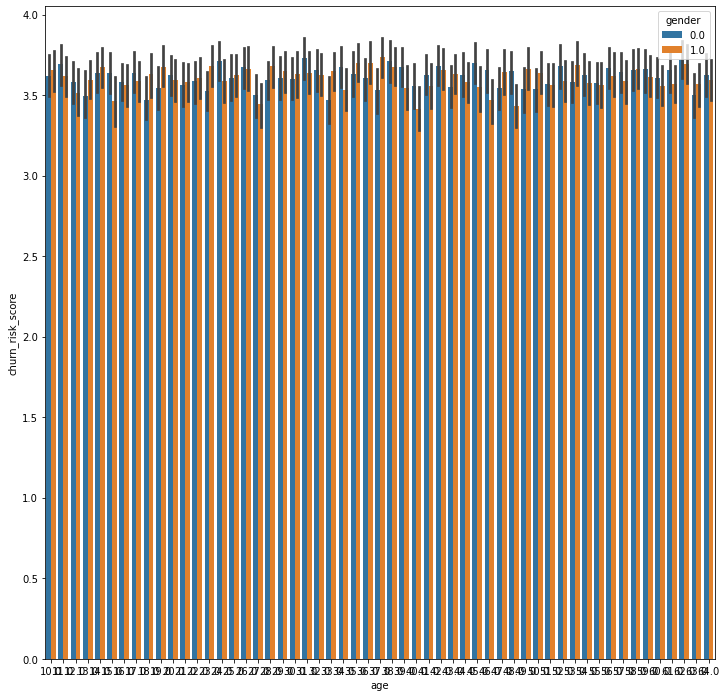

In [168]:
# visulization of age vs churn_risk_score
plt.figure(figsize=(12,12))
sns.barplot('age','churn_risk_score',hue='gender',data =df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

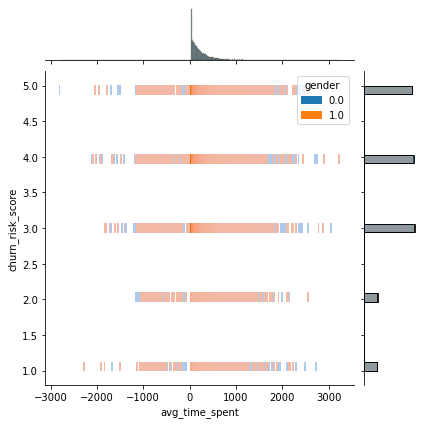

In [169]:
# visulization of avg_time_spent vs churn_risk_score
plt.figure(figsize=(12,12))
sns.jointplot('avg_time_spent','churn_risk_score',hue='gender',data =df,kind = "hist" )

In [170]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joined_days
0,18.0,0.0,0.0,5,0.0,1.0,1.0,1,17.0,300.63,53005.25,17.0,781.750000,1,1,0,0.0,1,2.0,1765
1,32.0,0.0,2.0,4,0.0,1.0,1.0,2,16.0,306.34,12838.38,10.0,686.849231,1,0,1,1.0,2,1.0,1754
2,44.0,0.0,1.0,0,1.0,1.0,1.0,1,14.0,516.16,21027.00,22.0,500.690000,0,1,1,2.0,3,5.0,2044
3,37.0,1.0,2.0,0,1.0,1.0,1.0,2,11.0,53.27,25239.56,6.0,567.660000,0,1,1,0.0,3,5.0,2057
4,31.0,0.0,2.0,0,0.0,2.0,2.0,2,20.0,113.13,24483.66,16.0,663.060000,0,1,1,1.0,3,5.0,1739


In [171]:
df.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
joined_days                     0
dtype: int64

In [172]:
# taking care of output column
df['churn_risk_score'].value_counts()

3.0    10424
4.0    10185
5.0     9827
2.0     2741
1.0     2652
Name: churn_risk_score, dtype: int64

In [173]:
#from the above value counts of output it's clearly shows that the output data is imbalanced so we need to balanced it

In [174]:
x = df.drop(['churn_risk_score'],axis=1).copy().values

In [175]:
x

array([[1.800e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.765e+03],
       [3.200e+01, 0.000e+00, 2.000e+00, ..., 1.000e+00, 2.000e+00,
        1.754e+03],
       [4.400e+01, 0.000e+00, 1.000e+00, ..., 2.000e+00, 3.000e+00,
        2.044e+03],
       ...,
       [2.300e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 3.000e+00,
        2.105e+03],
       [5.300e+01, 1.000e+00, 0.000e+00, ..., 0.000e+00, 4.000e+00,
        1.828e+03],
       [3.500e+01, 1.000e+00, 1.000e+00, ..., 0.000e+00, 2.000e+00,
        2.429e+03]])

In [176]:
y = df['churn_risk_score'].copy().values

In [177]:
y

array([2., 1., 5., ..., 4., 3., 2.])

In [178]:
# Applying SMOTE Over Sampling Strategy for balancing the output data
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
x_ov,y_ov = oversampler.fit_resample(x,y)
print('The dataset before oversampling: ',x.shape,y.shape)
print('The dataset after oversampling: ',x_ov.shape,y_ov.shape)

The dataset before oversampling:  (35829, 19) (35829,)
The dataset after oversampling:  (52120, 19) (52120,)


In [179]:
# Now we are having equally balanced target labels
print(sum(y == 1),sum(y_ov == 1))
print(sum(y == 2),sum(y_ov == 2))
print(sum(y == 3),sum(y_ov == 3))
print(sum(y == 4),sum(y_ov == 4))
print(sum(y == 5),sum(y_ov == 5))

2652 10424
2741 10424
10424 10424
10185 10424
9827 10424


In [180]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ov,y_ov,train_size=0.3,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(15636, 19) (15636,)
(36484, 19) (36484,)


In [181]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1,n_estimators=10,max_depth=10)
xgb.fit(x_train,y_train)
dt = DecisionTreeClassifier(criterion='gini',max_depth=9)
rf = RandomForestClassifier(n_estimators=100, max_depth=9)
rf.fit(X_train,y_train)
dt.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


DecisionTreeClassifier(max_depth=9)

In [183]:
y_pred_1 = dt.predict(X_test)
print("Accuraccy of Dicision Tree Algorithm is:",dt.score(X_test,y_test))

Accuraccy of Dicision Tree Algorithm is: 0.757236048678873


In [184]:
y_pred_2 = rf.predict(x_test)
print("Accuraccy of Random Forest Algorithm is:",rf.score(X_test,y_test))

Accuraccy of Random Forest Algorithm is: 0.7767514526915908


In [185]:
y_pred_3 = xgb.predict(x_test)
print("Accuraccy of Random Forest Algorithm is:",xgb.score(x_test,y_test))

Accuraccy of Random Forest Algorithm is: 0.7855772393377919


In [186]:
# Evalution of Models

In [187]:
from sklearn.metrics import classification_report
print("Classification Report of Random Forest Algorithm \n",classification_report(y_true = y_test,y_pred = y_pred_1))
print("Classification Report of Decision Tree Algorithm \n",classification_report(y_true = y_test,y_pred = y_pred_2))
print("Classification Report of XG Boost Algorithm \n",classification_report(y_true = y_test,y_pred = y_pred_3))

Classification Report of Random Forest Algorithm 
               precision    recall  f1-score   support

         1.0       0.77      0.73      0.75      7327
         2.0       0.76      0.72      0.74      7275
         3.0       0.86      0.87      0.86      7306
         4.0       0.70      0.58      0.64      7327
         5.0       0.71      0.88      0.79      7249

    accuracy                           0.76     36484
   macro avg       0.76      0.76      0.75     36484
weighted avg       0.76      0.76      0.75     36484

Classification Report of Decision Tree Algorithm 
               precision    recall  f1-score   support

         1.0       0.24      1.00      0.38      7327
         2.0       0.00      0.00      0.00      7275
         3.0       0.00      0.00      0.00      7306
         4.0       0.00      0.00      0.00      7327
         5.0       0.00      0.00      0.00      7249

    accuracy                           0.20     36484
   macro avg       0.05      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix of Random Forest Algorithm



Text(33.0, 0.5, 'Actual value')

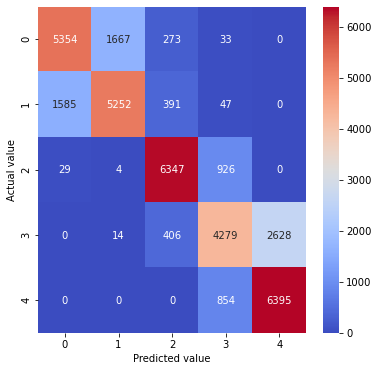

In [188]:
from sklearn.metrics import confusion_matrix,accuracy_score
plt.figure(figsize = (6,6))
print("Confusion Matrix of Random Forest Algorithm\n")
cm = confusion_matrix(y_true = y_test,y_pred = y_pred_1)
sns.heatmap(cm,annot = True,cmap = "coolwarm",fmt='g')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")

Confusion Matrix of Dicision Tress Algorithm



Text(33.0, 0.5, 'Actual value')

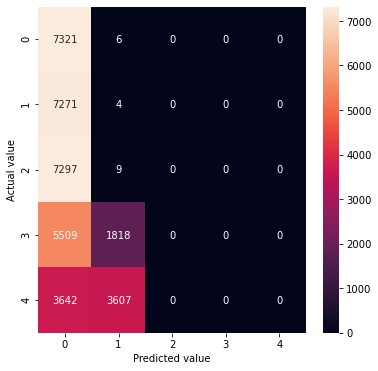

In [189]:
plt.figure(figsize = (6,6))
print("Confusion Matrix of Dicision Tress Algorithm\n")
cm_1 = confusion_matrix(y_true = y_test,y_pred = y_pred_2)
sns.heatmap(cm_1,annot = True,fmt='g')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")

Confusion Matrix of XG Boost Algorithm



Text(33.0, 0.5, 'Actual value')

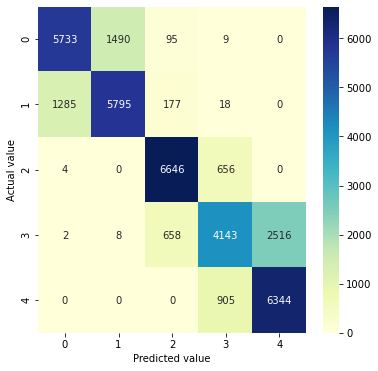

In [190]:
plt.figure(figsize = (6,6))
print("Confusion Matrix of XG Boost Algorithm\n")
cm_2 = confusion_matrix(y_true = y_test,y_pred = y_pred_3)
sns.heatmap(cm_2,annot = True,cmap = "YlGnBu",fmt='g')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")


 # Xgb Algorithm gives 79 % Accuracy

In [199]:
import pickle
import requests
import json

# Saving model using pickle
pickle.dump(xgb, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load( open('model.pkl','rb'))